# Pandas: Time Series

### Native Python dates and times: ``datetime`` and ``dateutil``

Python's basic objects for working with dates and times reside in the built-in ``datetime`` module.
Along with the third-party ``dateutil`` module, you can use it to quickly perform a host of useful functionalities on dates and times.
For example, you can manually build a date using the ``datetime`` type:

In [1]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

Or, using the ``dateutil`` module, you can parse dates from a variety of string formats:

In [3]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [4]:
date

datetime.datetime(2015, 7, 4, 0, 0)

Once you have a ``datetime`` object, you can do things like printing the day of the week:

In [5]:
date.strftime('%A')

'Saturday'

In the final line, we've used one of the standard string format codes for printing dates (``"%A"``), which you can read about in the [strftime section](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) of Python's [datetime documentation](https://docs.python.org/3/library/datetime.html).
Documentation of other useful date utilities can be found in [dateutil's online documentation](http://labix.org/python-dateutil).
A related package to be aware of is [``pytz``](http://pytz.sourceforge.net/), which contains tools for working with the most migrane-inducing piece of time series data: time zones.

The power of ``datetime`` and ``dateutil`` lie in their flexibility and easy syntax: you can use these objects and their built-in methods to easily perform nearly any operation you might be interested in.
Where they break down is when you wish to work with large arrays of dates and times:
just as lists of Python numerical variables are suboptimal compared to NumPy-style typed numerical arrays, lists of Python datetime objects are suboptimal compared to typed arrays of encoded dates.

### Typed arrays of times: NumPy's ``datetime64``

The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
The ``datetime64`` dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.
The ``datetime64`` requires a very specific input format:

In [6]:
import numpy as np
date = np.array('2015-07-04 05:50', dtype=np.datetime64)
date

array('2015-07-04T05:50', dtype='datetime64[m]')

Once we have this date formatted, however, we can quickly do vectorized operations on it:

In [7]:
date + np.arange(12)

array(['2015-07-04T05:50', '2015-07-04T05:51', '2015-07-04T05:52',
       '2015-07-04T05:53', '2015-07-04T05:54', '2015-07-04T05:55',
       '2015-07-04T05:56', '2015-07-04T05:57', '2015-07-04T05:58',
       '2015-07-04T05:59', '2015-07-04T06:00', '2015-07-04T06:01'],
      dtype='datetime64[m]')

In [11]:
aa = np.datetime64('2015-07-04 12:00:00')

Notice that the time zone is automatically set to the local time on the computer executing the code.
You can force any desired fundamental unit using one of many format codes; for example, here we'll force a nanosecond-based time:

In [19]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

The following table, drawn from the [NumPy datetime64 documentation](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html), lists the available format codes along with the relative and absolute timespans that they can encode:

|Code    | Meaning     | Time span (relative) | Time span (absolute)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | Year	       | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | Week	       | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| ``ns`` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| ``ps`` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| ``fs`` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| ``as`` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

For the types of data we see in the real world, a useful default is ``datetime64[ns]``, as it can encode a useful range of modern dates with a suitably fine precision.

### Dates and times in pandas: best of both worlds

Pandas builds upon all the tools just discussed to provide a ``Timestamp`` object, which combines the ease-of-use of ``datetime`` and ``dateutil`` with the efficient storage and vectorized interface of ``numpy.datetime64``.
From a group of these ``Timestamp`` objects, Pandas can construct a ``DatetimeIndex`` that can be used to index data in a ``Series`` or ``DataFrame``; we'll see many examples of this below.

In [20]:
import pandas as pd
# date = pd.to_datetime("4th of July, 2015")
date = pd.to_datetime("04-07-2015 04:30", dayfirst=True)
date

Timestamp('2015-07-04 04:30:00')

In [21]:
date.strftime('%A')

'Saturday'

In [22]:
pd.to_timedelta(np.arange(12), 'D')

TimedeltaIndex([ '0 days',  '1 days',  '2 days',  '3 days',  '4 days',
                 '5 days',  '6 days',  '7 days',  '8 days',  '9 days',
                '10 days', '11 days'],
               dtype='timedelta64[ns]', freq=None)

In [23]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04 04:30:00', '2015-07-05 04:30:00',
               '2015-07-06 04:30:00', '2015-07-07 04:30:00',
               '2015-07-08 04:30:00', '2015-07-09 04:30:00',
               '2015-07-10 04:30:00', '2015-07-11 04:30:00',
               '2015-07-12 04:30:00', '2015-07-13 04:30:00',
               '2015-07-14 04:30:00', '2015-07-15 04:30:00'],
              dtype='datetime64[ns]', freq=None)

In [10]:
pd.to_timedelta(np.arange(12), 'D')

TimedeltaIndex([ '0 days',  '1 days',  '2 days',  '3 days',  '4 days',
                 '5 days',  '6 days',  '7 days',  '8 days',  '9 days',
                '10 days', '11 days'],
               dtype='timedelta64[ns]', freq=None)

## Pandas Time Series: Indexing by Time

Where the Pandas time series tools really become useful is when you begin to *index data by timestamps*.
For example, we can construct a ``Series`` object that has time indexed data:

In [24]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-07', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-07    2
2015-08-04    3
dtype: int64

<AxesSubplot:>

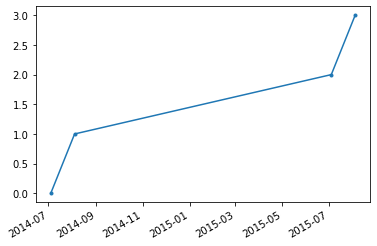

In [44]:
data.plot(marker='.')

Now that we have this data in a ``Series``, we can make use of any of the ``Series`` indexing patterns we discussed in previous sections, passing values that can be coerced into dates:

In [25]:
data['2014-07-04':'2015-01-01']

2014-07-04    0
2014-08-04    1
dtype: int64

There are additional special date-only indexing operations, such as passing a year to obtain a slice of all data from that year:

In [26]:
data['2015']

2015-07-07    2
2015-08-04    3
dtype: int64

In [32]:
data.index.hour

Int64Index([0, 0, 0, 0], dtype='int64')

In [37]:
data[data.index.month == 12]

Series([], dtype: int64)

In [62]:
data[data.index.day==7]

2015-07-07    2
dtype: int64

Later, we will see additional examples of the convenience of dates-as-indices.
But first, a closer look at the available time series data structures.

## Pandas Time Series Data Structures

This section will introduce the fundamental Pandas data structures for working with time series data:

- For *time stamps*, Pandas provides the ``Timestamp`` type. As mentioned before, it is essentially a replacement for Python's native ``datetime``, but is based on the more efficient ``numpy.datetime64`` data type. The associated Index structure is ``DatetimeIndex``.
- For *time Periods*, Pandas provides the ``Period`` type. This encodes a fixed-frequency interval based on ``numpy.datetime64``. The associated index structure is ``PeriodIndex``.
- For *time deltas* or *durations*, Pandas provides the ``Timedelta`` type. ``Timedelta`` is a more efficient replacement for Python's native ``datetime.timedelta`` type, and is based on ``numpy.timedelta64``. The associated index structure is ``TimedeltaIndex``.

The most fundamental of these date/time objects are the ``Timestamp`` and ``DatetimeIndex`` objects.
While these class objects can be invoked directly, it is more common to use the ``pd.to_datetime()`` function, which can parse a wide variety of formats.
Passing a single date to ``pd.to_datetime()`` yields a ``Timestamp``; passing a series of dates by default yields a ``DatetimeIndex``:

In [38]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

A ``TimedeltaIndex`` is created, for example, when a date is subtracted from another:

In [40]:
dates[1:] - dates[0:-1]

TimedeltaIndex(['1 days', '2 days', '1 days', '1 days'], dtype='timedelta64[ns]', freq=None)

### Regular sequences: ``pd.date_range()``

To make the creation of regular date sequences more convenient, Pandas offers a few functions for this purpose: ``pd.date_range()`` for timestamps, ``pd.period_range()`` for periods, and ``pd.timedelta_range()`` for time deltas.
We've seen that Python's ``range()`` and NumPy's ``np.arange()`` turn a startpoint, endpoint, and optional stepsize into a sequence.
Similarly, ``pd.date_range()`` accepts a start date, an end date, and an optional frequency code to create a regular sequence of dates.
By default, the frequency is one day:

In [67]:
np.arange(0, 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
pd.date_range('2015-07-03', '2020-07-03')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               '2015-07-11', '2015-07-12',
               ...
               '2020-06-24', '2020-06-25', '2020-06-26', '2020-06-27',
               '2020-06-28', '2020-06-29', '2020-06-30', '2020-07-01',
               '2020-07-02', '2020-07-03'],
              dtype='datetime64[ns]', length=1828, freq='D')

Alternatively, the date range can be specified not with a start and endpoint, but with a startpoint and a number of periods:

In [26]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

The spacing can be modified by altering the ``freq`` argument, which defaults to ``D``.
For example, here we will construct a range of hourly timestamps:

In [42]:
pd.date_range('2015-07-03', periods=8, freq='MS')

DatetimeIndex(['2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01'],
              dtype='datetime64[ns]', freq='MS')

To create regular sequences of ``Period`` or ``Timedelta`` values, the very similar ``pd.period_range()`` and ``pd.timedelta_range()`` functions are useful.
Here are some monthly periods:

In [43]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

And a sequence of durations increasing by an hour:

In [50]:
pd.timedelta_range('1 days', periods=10, freq='H')

TimedeltaIndex(['1 days 00:00:00', '1 days 01:00:00', '1 days 02:00:00',
                '1 days 03:00:00', '1 days 04:00:00', '1 days 05:00:00',
                '1 days 06:00:00', '1 days 07:00:00', '1 days 08:00:00',
                '1 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

## Frequencies and Offsets

Fundamental to these Pandas time series tools is the concept of a frequency or date offset.
Just as we saw the ``D`` (day) and ``H`` (hour) codes above, we can use such codes to specify any desired frequency spacing.
The following table summarizes the main codes available:

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |

The monthly, quarterly, and annual frequencies are all marked at the end of the specified period.
By adding an ``S`` suffix to any of these, they instead will be marked at the beginning:

| Code    | Description            || Code    | Description            |
|---------|------------------------||---------|------------------------|
| ``MS``  | Month start            ||``BMS``  | Business month start   |
| ``QS``  | Quarter start          ||``BQS``  | Business quarter start |
| ``AS``  | Year start             ||``BAS``  | Business year start    |

Additionally, you can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix:

- ``Q-JAN``, ``BQ-FEB``, ``QS-MAR``, ``BQS-APR``, etc.
- ``A-JAN``, ``BA-FEB``, ``AS-MAR``, ``BAS-APR``, etc.

In the same way, the split-point of the weekly frequency can be modified by adding a three-letter weekday code:

- ``W-SUN``, ``W-MON``, ``W-TUE``, ``W-WED``, etc.

On top of this, codes can be combined with numbers to specify other frequencies.
For example, for a frequency of 2 hours 30 minutes, we can combine the hour (``H``) and minute (``T``) codes as follows:

In [52]:
pd.to_datetime('2022-07-01') + pd.timedelta_range(0, periods=9, freq="2H30T")

DatetimeIndex(['2022-07-01 00:00:00', '2022-07-01 02:30:00',
               '2022-07-01 05:00:00', '2022-07-01 07:30:00',
               '2022-07-01 10:00:00', '2022-07-01 12:30:00',
               '2022-07-01 15:00:00', '2022-07-01 17:30:00',
               '2022-07-01 20:00:00'],
              dtype='datetime64[ns]', freq='150T')

All of these short codes refer to specific instances of Pandas time series offsets, which can be found in the ``pd.tseries.offsets`` module.
For example, we can create a business day offset directly as follows:

In [ ]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## Reading data

In [54]:
df = pd.read_table('data/data_waves.dat')
df

,1979 01 01 05:00:00 2.817 6.8 7.7 226.8 223.4 27.2 80.02 76.40 93.04 10.30 3.32
0,1979 01 01 06:00:00 3.407 7.4 8.5 229.8 2...
1,1979 01 01 07:00:00 4.644 8.1 9.3 231.5 2...
2,1979 01 01 08:00:00 5.131 8.6 9.9 230.7 2...
3,1979 01 01 09:00:00 4.297 8.6 9.9 228.4 2...
4,1979 01 01 10:00:00 3.510 8.4 9.5 225.5 2...
...,...
341869,2017 12 31 19:00:00 0.709 5.2 7.3 201.3 2...
341870,2017 12 31 20:00:00 0.711 5.4 7.3 203.1 2...
341871,2017 12 31 21:00:00 0.708 5.6 7.2 205.6 2...
341872,2017 12 31 22:00:00 0.709 5.8 7.2 207.6 2...


In [62]:
df = pd.read_table('data/data_waves.dat', header=None, delim_whitespace=True, 
                   names=['YY', 'mm', 'DD', 'time', 'hs', 'tm', 'tp', 'dirm', 'dp', 'spr', 'h', 'lm', 'lp', 
                          'uw', 'vw'],
                  parse_dates=[[0, 1, 2, 3]], index_col=0)
df

,hs,tm,tp,dirm,dp,spr,h,lm,lp,uw,vw
YY_mm_DD_time,,,,,,,,,,,
1979-01-01 05:00:00,2.817,6.8,7.7,226.8,223.4,27.2,80.02,76.40,93.04,10.30,3.32
1979-01-01 06:00:00,3.407,7.4,8.5,229.8,226.5,25.6,80.02,91.55,112.80,13.27,3.68
1979-01-01 07:00:00,4.644,8.1,9.3,231.5,229.2,24.7,80.02,110.38,135.01,17.11,6.84
1979-01-01 08:00:00,5.131,8.6,9.9,230.7,225.0,25.3,80.02,122.50,152.12,16.92,6.68
1979-01-01 09:00:00,4.297,8.6,9.9,228.4,221.1,27.5,80.02,123.26,153.09,10.32,-4.45
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,0.709,5.2,7.3,201.3,215.1,31.3,80.02,50.30,83.92,-2.71,5.59
2017-12-31 20:00:00,0.711,5.4,7.3,203.1,217.9,29.4,80.02,52.79,82.20,-2.30,5.26
2017-12-31 21:00:00,0.708,5.6,7.2,205.6,217.7,28.4,80.02,56.79,81.09,-4.36,2.46


names=['YY', 'mm', 'DD', 'time', 'hs', 'tm', 'tp', 'dirm', 'dp', 'spr', 'h', 'lm', 'lp', 
                          'uw', 'vw']

In [63]:
df = pd.read_table('data/data_waves.dat', header=None, delim_whitespace=True, parse_dates=[[0, 1, 2, 3]], 
                   index_col=0,
                   names=['YY', 'mm', 'DD', 'time', 'hs', 'tm', 'tp', 'dirm', 'dp', 'spr', 'h', 'lm', 'lp', 
                          'uw', 'vw'])
df.loc[df['tp'] < 0, 'tp'] = np.NaN
df.loc[df.tp > 20, 'tp'] = np.NaN
df.dropna(inplace=True) # df = df.dropna()
df

,hs,tm,tp,dirm,dp,spr,h,lm,lp,uw,vw
YY_mm_DD_time,,,,,,,,,,,
1979-01-01 05:00:00,2.817,6.8,7.7,226.8,223.4,27.2,80.02,76.40,93.04,10.30,3.32
1979-01-01 06:00:00,3.407,7.4,8.5,229.8,226.5,25.6,80.02,91.55,112.80,13.27,3.68
1979-01-01 07:00:00,4.644,8.1,9.3,231.5,229.2,24.7,80.02,110.38,135.01,17.11,6.84
1979-01-01 08:00:00,5.131,8.6,9.9,230.7,225.0,25.3,80.02,122.50,152.12,16.92,6.68
1979-01-01 09:00:00,4.297,8.6,9.9,228.4,221.1,27.5,80.02,123.26,153.09,10.32,-4.45
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,0.709,5.2,7.3,201.3,215.1,31.3,80.02,50.30,83.92,-2.71,5.59
2017-12-31 20:00:00,0.711,5.4,7.3,203.1,217.9,29.4,80.02,52.79,82.20,-2.30,5.26
2017-12-31 21:00:00,0.708,5.6,7.2,205.6,217.7,28.4,80.02,56.79,81.09,-4.36,2.46


In [64]:
df.describe()

,hs,tm,tp,dirm,dp,spr,h,lm,lp,uw,vw
count,341871.00000,341871.000000,341871.000000,341871.000000,341871.000000,341871.000000,3.418710e+05,341871.000000,341871.000000,341871.000000,341871.000000
mean,0.63840,4.640335,5.531238,191.229090,194.730917,33.888042,8.002000e+01,41.222954,54.183349,-1.967204,-0.476885
std,0.57111,1.476642,2.035959,53.623934,52.444765,13.366277,3.758492e-10,26.447224,39.657451,3.621339,3.768594
min,0.00500,1.400000,0.000000,0.000000,0.000000,4.300000,8.002000e+01,3.070000,0.000000,-20.650000,-23.010000
25%,0.23600,3.500000,4.000000,171.000000,171.300000,23.800000,8.002000e+01,21.820000,24.960000,-4.080000,-2.540000
50%,0.45600,4.400000,5.200000,204.300000,211.100000,31.000000,8.002000e+01,33.500000,41.690000,-1.880000,-0.050000
75%,0.86600,5.500000,6.900000,218.700000,222.900000,41.200000,8.002000e+01,53.820000,74.010000,0.310000,1.960000
max,6.39900,12.000000,15.200000,360.000000,360.000000,80.900000,8.002000e+01,231.500000,329.050000,20.370000,18.820000


<AxesSubplot:xlabel='YY_mm_DD_time'>

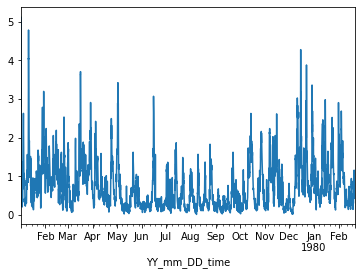

In [69]:
df.hs[:10000].plot()

In [70]:
df.max()

hs        6.399
tm       12.000
tp       15.200
dirm    360.000
dp      360.000
spr      80.900
h        80.020
lm      231.500
lp      329.050
uw       20.370
vw       18.820
dtype: float64

In [71]:
df.sort_values('hs', ascending=False)

,hs,tm,tp,dirm,dp,spr,h,lm,lp,uw,vw
YY_mm_DD_time,,,,,,,,,,,
2008-03-21 19:00:00,6.399,10.0,11.6,221.6,221.4,23.0,80.02,166.28,206.41,15.04,8.77
2008-03-21 20:00:00,6.256,9.9,11.4,222.7,221.9,23.7,80.02,162.84,200.73,15.00,7.67
2008-10-30 07:00:00,6.211,9.6,11.0,214.5,210.7,24.4,80.02,152.81,188.76,14.28,12.89
2008-03-21 18:00:00,6.054,10.1,11.8,221.1,214.6,21.9,80.02,169.06,214.29,15.71,6.83
1999-12-28 04:00:00,5.934,8.9,10.2,224.5,217.5,27.9,80.02,132.81,162.10,18.50,8.27
...,...,...,...,...,...,...,...,...,...,...,...
1981-11-06 13:00:00,0.006,2.3,2.0,222.6,234.1,25.0,80.02,9.31,6.11,-0.46,1.96
1981-11-06 17:00:00,0.005,3.1,3.3,208.8,206.1,25.5,80.02,18.63,16.58,0.76,-1.07
1981-11-06 14:00:00,0.005,2.4,3.2,221.0,211.2,27.0,80.02,10.43,16.33,-0.29,1.97


## Resampling, Shifting, and Windowing

In [11]:
df['hs']

YY_mm_DD_time
1979-01-01 05:00:00    2.817
1979-01-01 06:00:00    3.407
1979-01-01 07:00:00    4.644
1979-01-01 08:00:00    5.131
1979-01-01 09:00:00    4.297
                       ...  
2017-12-31 19:00:00    0.709
2017-12-31 20:00:00    0.711
2017-12-31 21:00:00    0.708
2017-12-31 22:00:00    0.709
2017-12-31 23:00:00    0.715
Name: hs, Length: 341875, dtype: float64

<AxesSubplot:xlabel='YY_mm_DD_time'>

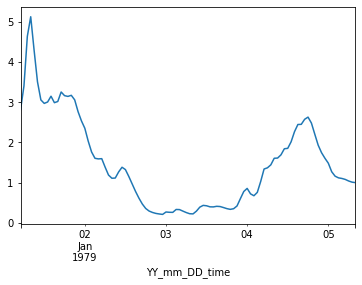

In [74]:
df.hs[:100].plot()

<AxesSubplot:xlabel='YY_mm_DD_time'>

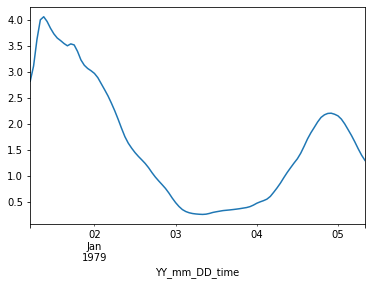

In [73]:
df.rolling('12H').mean().hs[:100].plot()

In [76]:
dfi = df.iloc[:500]

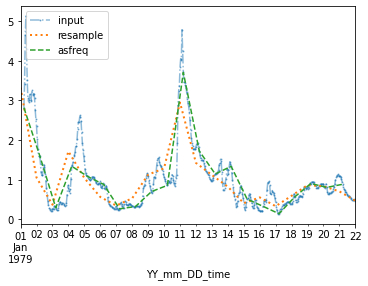

In [77]:
import matplotlib.pyplot as plt
dfi.hs.plot(alpha=0.5, style='-.', marker='o', markersize=1)
dfi.hs.resample('24H').mean().plot(style=':', linewidth=2)
dfi.hs.asfreq('24H').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

<AxesSubplot:xlabel='YY_mm_DD_time'>

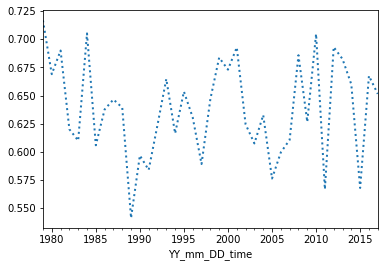

In [41]:
#df.hs.plot(alpha=0.5, style='-.', marker='o', markersize=1)
df_res = df.hs.resample('A').mean()
df_res.plot(style=':', linewidth=2)

<AxesSubplot:xlabel='YY_mm_DD_time'>

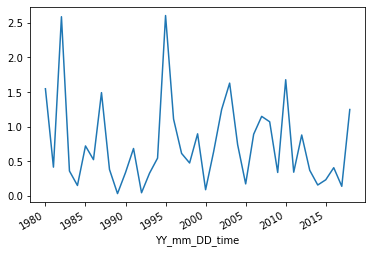

In [43]:
df.hs.asfreq('Y').plot()

Notice the difference: at each point, ``resample`` reports the *average of the previous year*, while ``asfreq`` reports the *value at the end of the year*.

For up-sampling, ``resample()`` and ``asfreq()`` are largely equivalent, though resample has many more options available.
In this case, the default for both methods is to leave the up-sampled points empty, that is, filled with NA values.
Just as with the ``pd.fillna()`` function discussed previously, ``asfreq()`` accepts a ``method`` argument to specify how values are imputed.
Here, we will resample the business day data at a daily frequency (i.e., including weekends):

In [82]:
df.resample('A').max()

,hs,tm,tp,dirm,dp,spr,h,lm,lp,uw,vw
YY_mm_DD_time,,,,,,,,,,,
1979-12-31,5.131,10.8,13.9,359.4,357.7,80.0,80.02,195.60,286.11,17.97,13.48
1980-12-31,3.844,10.1,13.5,359.9,359.6,80.7,80.02,168.88,271.40,13.64,13.48
1981-12-31,5.507,10.7,13.3,358.7,359.9,79.5,80.02,183.37,264.52,17.22,13.52
1982-12-31,4.733,9.2,13.0,358.5,357.9,80.5,80.02,142.52,253.07,17.41,13.98
1983-12-31,3.878,9.8,12.2,359.8,360.0,80.1,80.02,159.33,227.27,15.89,11.19
1984-12-31,3.787,10.0,13.4,359.0,359.2,80.7,80.02,164.74,266.60,13.56,15.17
1985-12-31,4.796,10.3,13.4,360.0,359.5,80.5,80.02,176.13,267.80,16.49,12.25
1986-12-31,4.909,10.6,13.3,359.6,357.1,80.0,80.02,190.74,264.06,14.99,10.32
1987-12-31,4.119,10.8,15.0,359.5,359.9,80.0,80.02,196.58,320.72,14.69,11.88


In [81]:
annual_max = df.groupby(df.index.year).max()
annual_max

,hs,tm,tp,dirm,dp,spr,h,lm,lp,uw,vw
YY_mm_DD_time,,,,,,,,,,,
1979,5.131,10.8,13.9,359.4,357.7,80.0,80.02,195.60,286.11,17.97,13.48
1980,3.844,10.1,13.5,359.9,359.6,80.7,80.02,168.88,271.40,13.64,13.48
1981,5.507,10.7,13.3,358.7,359.9,79.5,80.02,183.37,264.52,17.22,13.52
1982,4.733,9.2,13.0,358.5,357.9,80.5,80.02,142.52,253.07,17.41,13.98
1983,3.878,9.8,12.2,359.8,360.0,80.1,80.02,159.33,227.27,15.89,11.19
1984,3.787,10.0,13.4,359.0,359.2,80.7,80.02,164.74,266.60,13.56,15.17
1985,4.796,10.3,13.4,360.0,359.5,80.5,80.02,176.13,267.80,16.49,12.25
1986,4.909,10.6,13.3,359.6,357.1,80.0,80.02,190.74,264.06,14.99,10.32
1987,4.119,10.8,15.0,359.5,359.9,80.0,80.02,196.58,320.72,14.69,11.88


In [54]:
index_hs_max=df.hs.groupby(df.index.year).idxmax()
index_hs_max

YY_mm_DD_time
1979   1979-01-01 08:00:00
1980   1980-12-06 09:00:00
1981   1981-12-08 19:00:00
1982   1982-10-14 19:00:00
1983   1983-11-27 14:00:00
1984   1984-09-23 16:00:00
1985   1985-03-16 16:00:00
1986   1986-01-24 06:00:00
1987   1987-06-15 21:00:00
1988   1988-01-29 20:00:00
1989   1989-02-26 20:00:00
1990   1990-02-27 14:00:00
1991   1991-10-18 18:00:00
1992   1992-03-23 22:00:00
1993   1993-12-24 11:00:00
1994   1994-09-15 17:00:00
1995   1995-01-26 22:00:00
1996   1996-02-19 01:00:00
1997   1997-05-06 21:00:00
1998   1998-04-11 22:00:00
1999   1999-12-28 04:00:00
2000   2000-11-06 13:00:00
2001   2001-11-08 21:00:00
2002   2002-02-20 22:00:00
2003   2003-02-03 22:00:00
2004   2004-01-12 19:00:00
2005   2005-04-16 16:00:00
2006   2006-03-03 17:00:00
2007   2007-03-01 20:00:00
2008   2008-03-21 19:00:00
2009   2009-01-25 03:00:00
2010   2010-11-08 17:00:00
2011   2011-12-16 19:00:00
2012   2012-10-28 10:00:00
2013   2013-12-26 00:00:00
2014   2014-11-05 04:00:00
2015   2015-11

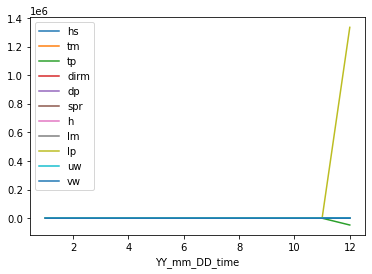

In [56]:
df.groupby(df.index.month).mean().plot();